<a href="https://colab.research.google.com/github/udlbook/udlbook/blob/main/Blogs/BorealisBayesianFunction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bayesian machine learning: function view

This blog contains code that accompanies the Borealis AI blog on Bayesian methods for machine learning (function view).  Contact udlbookmail@gmail.com if you find any problems.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
from scipy.stats import multivariate_normal

Create data for linear model.   One dimensional inputs and one dimensional outputs.  Ones appended to inputs to account for intercepts.

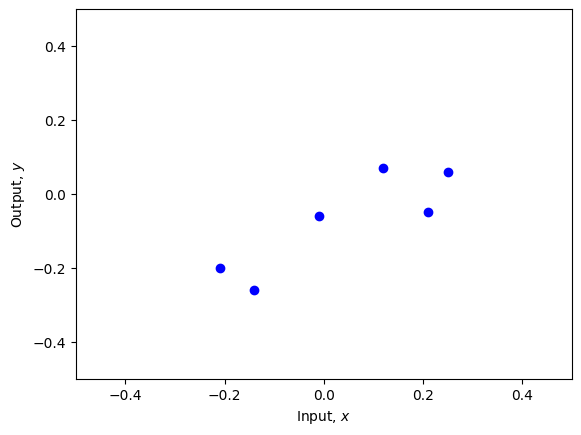

In [ ]:
X = np.array([[-0.21,-0.14,-0.01,0.12, 0.25, 0.21],[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]])
y = np.array([-0.20, -0.26, -0.06, 0.07, 0.06, -0.05])

fig,ax = plt.subplots()
ax.plot(X[0,:],y,'bo')
ax.set_xlim(-0.5,0.5)
ax.set_ylim(-0.5, 0.5)
ax.set_xlabel('Input, $x$')
ax.set_ylabel('Output, $y$')
plt.show()

# Function prior

In [ ]:
# Define a prior over the parameters (2 dimensional as intercept + slope)
sigma_sq_p = 0.4
sigma_sq_n = 0.005
prior_param_mean = np.zeros((2,1))
prior_param_cov = sigma_sq_p * np.identity(2)

# This then defines a prior over the function
# Define some points to plot function
X_plot = np.atleast_2d(np.arange(-0.5,0.5, 0.01))
X_plot = np.concatenate([X_plot, np.ones_like(X_plot)],axis=0)
n_data = X_plot.shape[1]

# Prior mean and covariance for function, f
prior_func_mean = np.zeros((n_data, 1))
prior_func_cov = sigma_sq_p * X_plot.transpose() @ X_plot

# Prior mean and covariance for output, y
prior_output_mean = np.zeros((n_data, 1))
prior_output_cov = sigma_sq_p * X_plot.transpose() @ X_plot  + sigma_sq_n * np.identity(n_data)

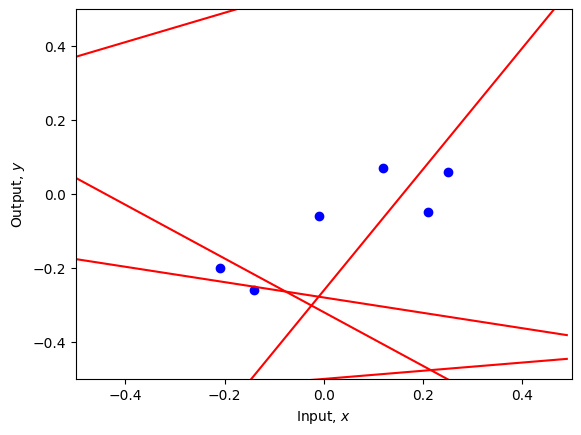

In [ ]:
# Draw samples from the function prior and plot them
np.random.seed(5)
function_draws = np.random.multivariate_normal(np.squeeze(prior_func_mean), prior_func_cov, 5).T

fig,ax = plt.subplots()
ax.plot(X[0,:],y,'bo')
for i in range(function_draws.shape[1]):
  ax.plot(X_plot[0,:], function_draws[:,i].transpose(), 'r-')

ax.set_xlim(-0.5,0.5)
ax.set_ylim(-0.5, 0.5)
ax.set_xlabel('Input, $x$')
ax.set_ylabel('Output, $y$')
plt.show()

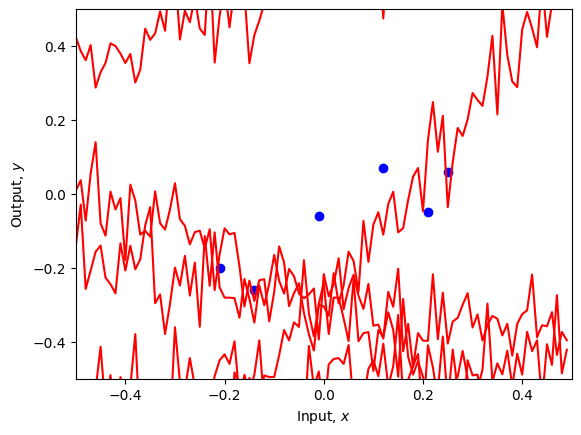

In [ ]:
# Draw samples from the function prior and plot them
np.random.seed(5)
function_draws = np.random.multivariate_normal(np.squeeze(prior_output_mean), prior_output_cov, 5).T

fig,ax = plt.subplots()
ax.plot(X[0,:],y,'bo')
for i in range(function_draws.shape[1]):
  ax.plot(X_plot[0,:], function_draws[:,i].transpose(), 'r-')

ax.set_xlim(-0.5,0.5)
ax.set_ylim(-0.5, 0.5)
ax.set_xlabel('Input, $x$')
ax.set_ylabel('Output, $y$')
plt.show()

# Inference

In [ ]:
# Posterior mean and covariance for function, f
inv_term = np.linalg.inv(X.transpose()@X + (sigma_sq_n/sigma_sq_p) * np.identity(X.shape[1]))
post_func_mean = X_plot.transpose() @ X @ inv_term @ y
post_func_cov = sigma_sq_p * X_plot.transpose() @ X_plot - sigma_sq_p  * X_plot.transpose() @ X @ inv_term @ X.transpose() @ X_plot

# Posterior mean and covariance for output, y
post_output_mean = X_plot.transpose() @ X @ inv_term @ y
post_output_cov = sigma_sq_p * X_plot.transpose() @ X_plot - sigma_sq_p  * X_plot.transpose() @ X @ inv_term @ X.transpose() @ X_plot + sigma_sq_n * np.identity(n_data)

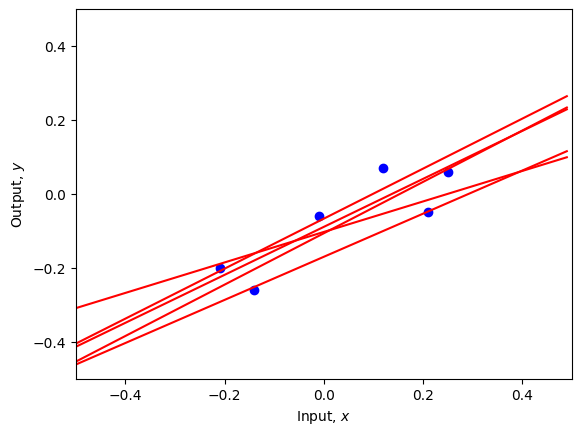

In [ ]:
# Draw samples from the function posterior and plot them
np.random.seed(5)
function_draws = np.random.multivariate_normal(np.squeeze(post_func_mean), post_func_cov, 5).T

fig,ax = plt.subplots()
ax.plot(X[0,:],y,'bo')
for i in range(function_draws.shape[1]):
  ax.plot(X_plot[0,:], function_draws[:,i].transpose(), 'r-')

ax.set_xlim(-0.5,0.5)
ax.set_ylim(-0.5, 0.5)
ax.set_xlabel('Input, $x$')
ax.set_ylabel('Output, $y$')
plt.show()

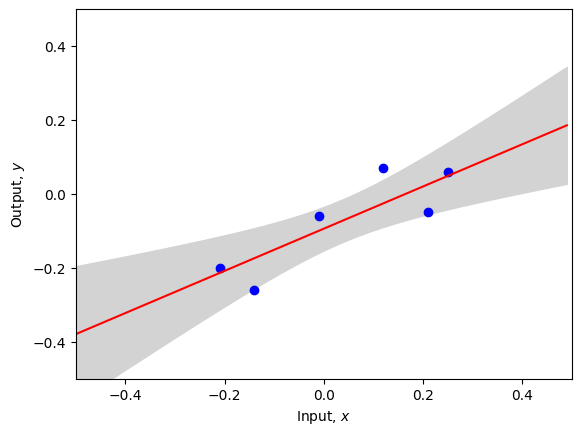

In [ ]:
fig,ax = plt.subplots()
ax.plot(X[0,:],y,'bo')
post_func_cov_diag = np.diag(post_func_cov)
ax.plot(X_plot[0,:], post_func_mean,'r-')
ax.fill_between(X_plot[0,:], post_func_mean-2*np.sqrt(post_func_cov_diag), post_func_mean+2*np.sqrt(post_func_cov_diag), color='lightgray')
ax.set_xlim(-0.5,0.5)
ax.set_ylim(-0.5, 0.5)
ax.set_xlabel('Input, $x$')
ax.set_ylabel('Output, $y$')
plt.show()

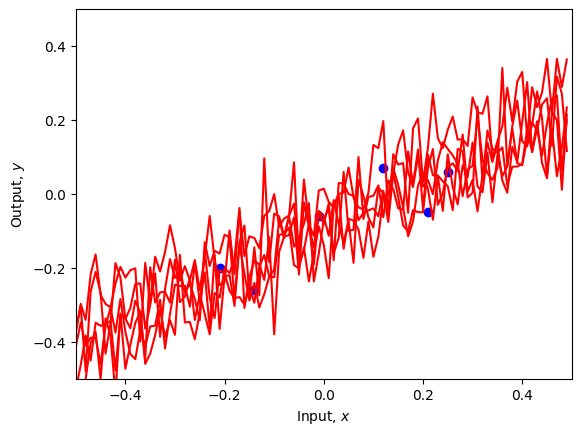

In [ ]:
# Draw samples from the output posterior and plot them
np.random.seed(5)
function_draws = np.random.multivariate_normal(np.squeeze(post_output_mean), post_output_cov, 5).T

fig,ax = plt.subplots()
ax.plot(X[0,:],y,'bo')
for i in range(function_draws.shape[1]):
  ax.plot(X_plot[0,:], function_draws[:,i].transpose(), 'r-')

ax.set_xlim(-0.5,0.5)
ax.set_ylim(-0.5, 0.5)
ax.set_xlabel('Input, $x$')
ax.set_ylabel('Output, $y$')
plt.show()

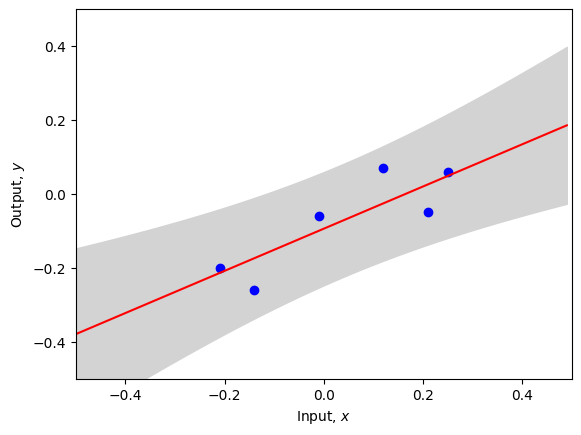

In [ ]:
fig,ax = plt.subplots()
ax.plot(X[0,:],y,'bo')
post_output_cov_diag = np.diag(post_output_cov)
ax.plot(X_plot[0,:], post_output_mean,'r-')
ax.fill_between(X_plot[0,:], post_output_mean-2*np.sqrt(post_output_cov_diag), post_output_mean+2*np.sqrt(post_output_cov_diag), color='lightgray')
ax.set_xlim(-0.5,0.5)
ax.set_ylim(-0.5, 0.5)
ax.set_xlabel('Input, $x$')
ax.set_ylabel('Output, $y$')
plt.show()

# Create data for non-linear model

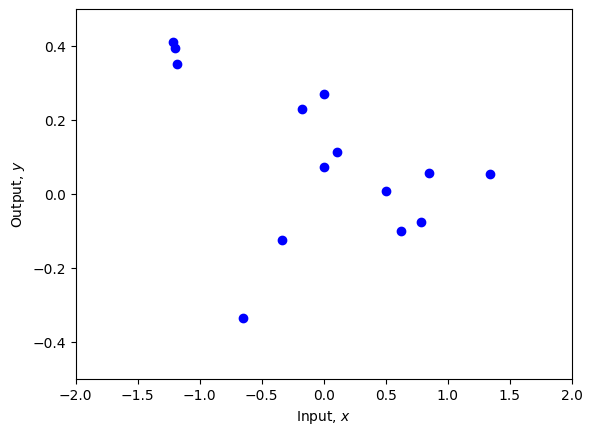

In [ ]:
np.random.seed(7)
I = 15
X = np.atleast_2d(np.random.uniform(-1.4, 1.4, I))
X = np.concatenate([X, np.ones_like(X)],axis=0)
y = np.cos(X[0,:]*4.5) * np.exp((-X[0,:]/2-0.5)*2) * 0.5 + np.random.normal(size=(I)) * 0.1

fig,ax = plt.subplots()
ax.plot(X[0,:],y,'bo')
ax.set_xlim(-2.,2.)
ax.set_ylim(-.5,.5)
ax.set_xlabel('Input, $x$')
ax.set_ylabel('Output, $y$')
plt.show()

# Fit polynomial model

In [ ]:
# Transform input data to polynomials
def nonlin_polynomial(x):
  X_out = np.zeros((5, x.shape[1]))
  X_out[0,:] = np.ones((1, x.shape[1]))
  X_out[1,:] = x
  X_out[2,:] = x * x
  X_out[3,:] = x * x * x
  X_out[4,:] = x * x * x * x

  return X_out

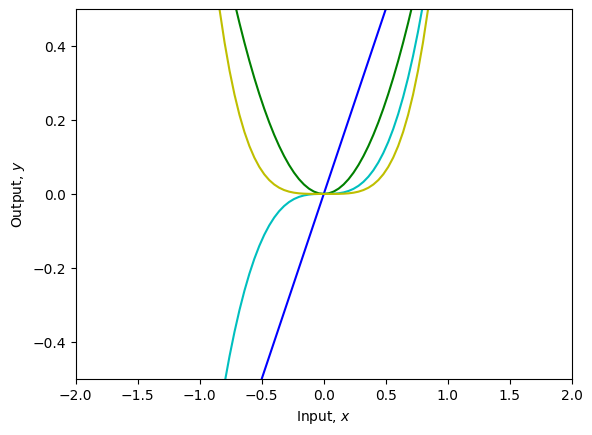

In [ ]:
# Define some points to plot function and transform
x_plot = np.atleast_2d(np.arange(-2,2,0.04))
Z_plot = nonlin_polynomial(x_plot)
n_data = x_plot.shape[1]

fig,ax = plt.subplots()
ax.plot(np.squeeze(x_plot), np.squeeze(Z_plot[0:1,:]),'r-')
ax.plot(np.squeeze(x_plot), np.squeeze(Z_plot[1:2,:]),'b-')
ax.plot(np.squeeze(x_plot), np.squeeze(Z_plot[2:3,:]),'g-')
ax.plot(np.squeeze(x_plot), np.squeeze(Z_plot[3:4,:]),'c-')
ax.plot(np.squeeze(x_plot), np.squeeze(Z_plot[4:5,:]),'y-')
ax.set_xlim(-2,2)
ax.set_ylim(-0.5, 0.5)
ax.set_xlabel('Input, $x$')
ax.set_ylabel('Output, $y$')
plt.show()

In [ ]:
# Define a prior over the parameters (2 dimensional as intercept + slope)
sigma_sq_p = 0.4
sigma_sq_n = 0.005
prior_param_mean = np.zeros((2,1))
prior_param_cov = sigma_sq_p * np.identity(2)

# Prior mean and covariance for function, f
prior_func_mean = np.zeros((n_data, 1))
prior_func_cov = sigma_sq_p * Z_plot.transpose() @ Z_plot

# Prior mean and covariance for output, y
prior_output_mean = np.zeros((n_data, 1))
prior_output_cov = sigma_sq_p * Z_plot.transpose() @ Z_plot  + sigma_sq_n * np.identity(n_data)

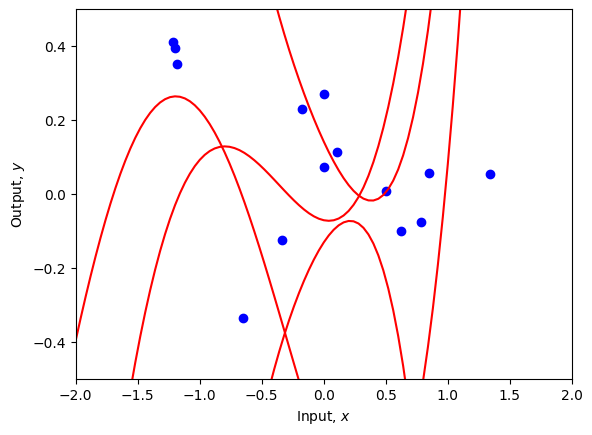

In [ ]:
# Draw samples from the function prior and plot them
np.random.seed(1)
function_draws = np.random.multivariate_normal(np.squeeze(prior_func_mean), prior_func_cov, 5).T

fig,ax = plt.subplots()
ax.plot(X[0,:],y,'bo')
for i in range(function_draws.shape[1]):
  ax.plot(x_plot[0,:], function_draws[:,i].transpose(), 'r-')

ax.set_xlim(-2,2)
ax.set_ylim(-0.5, 0.5)
ax.set_xlabel('Input, $x$')
ax.set_ylabel('Output, $y$')
plt.show()

In [ ]:
# Transform training data
Z = nonlin_polynomial(X[0:1,:])

# Posterior mean and covariance for function, f
inv_term = np.linalg.inv(Z.transpose()@Z + (sigma_sq_n/sigma_sq_p) * np.identity(Z.shape[1]))
post_func_mean = Z_plot.transpose() @ Z @ inv_term @ y
post_func_cov = sigma_sq_p * Z_plot.transpose() @ Z_plot - sigma_sq_p  * Z_plot.transpose() @ Z @ inv_term @ Z.transpose() @ Z_plot

# Posterior mean and covariance for output, y
post_output_mean = Z_plot.transpose() @ Z @ inv_term @ y
post_output_cov = sigma_sq_p * Z_plot.transpose() @ Z_plot - sigma_sq_p  * Z_plot.transpose() @ Z @ inv_term @ Z.transpose() @ Z_plot + sigma_sq_n * np.identity(n_data)

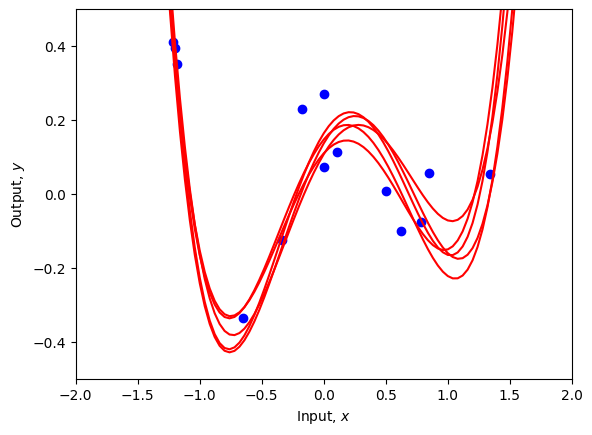

In [ ]:
# Draw samples from the function posterior and plot them
np.random.seed(5)
function_draws = np.random.multivariate_normal(np.squeeze(post_func_mean), post_func_cov, 5).T

fig,ax = plt.subplots()
ax.plot(X[0,:],y,'bo')
for i in range(function_draws.shape[1]):
  ax.plot(x_plot[0,:], function_draws[:,i].transpose(), 'r-')

ax.set_xlim(-2.,2.)
ax.set_ylim(-0.5, 0.5)
ax.set_xlabel('Input, $x$')
ax.set_ylabel('Output, $y$')
plt.show()

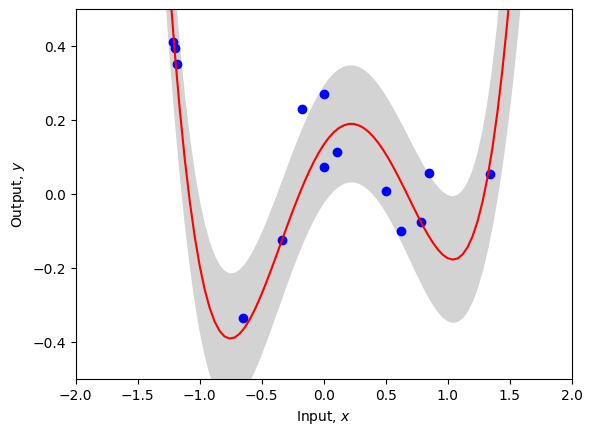

In [ ]:
fig,ax = plt.subplots()
ax.plot(X[0,:],y,'bo')
post_output_cov_diag = np.diag(post_output_cov)
ax.plot(x_plot[0,:], post_output_mean,'r-')
ax.fill_between(x_plot[0,:], post_output_mean-2*np.sqrt(post_output_cov_diag), post_output_mean+2*np.sqrt(post_output_cov_diag), color='lightgray')
ax.set_xlim(-2,2)
ax.set_ylim(-0.5, 0.5)
ax.set_xlabel('Input, $x$')
ax.set_ylabel('Output, $y$')
plt.show()

# Fit the ReLU model

In [ ]:
# Define the Rectified Linear Unit (ReLU) function
def ReLU(preactivation):
  activation = preactivation.clip(0.0)
  return activation

# Transform intput data to ReLU basis functions
def nonlin_relu(x):
  X_out = np.zeros((6, x.shape[1]))
  X_out[0,:] = np.ones((1, x.shape[1]))
  X_out[1,:] = ReLU(x-1.2)
  X_out[2,:] = ReLU(x-0.6)
  X_out[3,:] = ReLU(x-0.0)
  X_out[4,:] = ReLU(x+0.6)
  X_out[5,:] = ReLU(x+1.2)
  return X_out


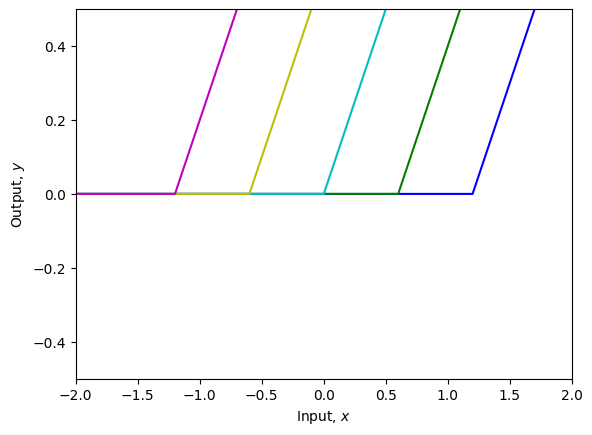

In [ ]:
x_plot = np.atleast_2d(np.arange(-2.,2.,0.04))
Z_plot = nonlin_relu(x_plot)

fig,ax = plt.subplots()
ax.plot(np.squeeze(x_plot), np.squeeze(Z_plot[0:1,:]),'r-')
ax.plot(np.squeeze(x_plot), np.squeeze(Z_plot[1:2,:]),'b-')
ax.plot(np.squeeze(x_plot), np.squeeze(Z_plot[2:3,:]),'g-')
ax.plot(np.squeeze(x_plot), np.squeeze(Z_plot[3:4,:]),'c-')
ax.plot(np.squeeze(x_plot), np.squeeze(Z_plot[4:5,:]),'y-')
ax.plot(np.squeeze(x_plot), np.squeeze(Z_plot[5:6,:]),'m-')
ax.set_xlim(-2.,2.)
ax.set_ylim(-0.5, 0.5)
ax.set_xlabel('Input, $x$')
ax.set_ylabel('Output, $y$')
plt.show()

In [ ]:
# Define a prior over the parameters (2 dimensional as intercept + slope)
sigma_sq_p = 0.4
sigma_sq_n = 0.005
prior_param_mean = np.zeros((2,1))
prior_param_cov = sigma_sq_p * np.identity(2)

# Prior mean and covariance for function, f
prior_func_mean = np.zeros((n_data, 1))
prior_func_cov = sigma_sq_p * Z_plot.transpose() @ Z_plot

# Prior mean and covariance for output, y
prior_output_mean = np.zeros((n_data, 1))
prior_output_cov = sigma_sq_p * Z_plot.transpose() @ Z_plot  + sigma_sq_n * np.identity(n_data)

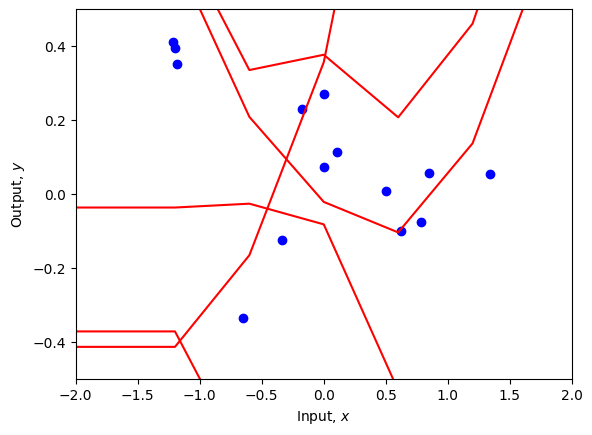

In [ ]:
# Draw samples from the function prior and plot them
np.random.seed(30)
function_draws = np.random.multivariate_normal(np.squeeze(prior_func_mean), prior_func_cov, 5).T

fig,ax = plt.subplots()
ax.plot(X[0,:],y,'bo')
for i in range(function_draws.shape[1]):
  ax.plot(x_plot[0,:], function_draws[:,i].transpose(), 'r-')

ax.set_xlim(-2,2)
ax.set_ylim(-0.5, 0.5)
ax.set_xlabel('Input, $x$')
ax.set_ylabel('Output, $y$')
plt.show()

In [ ]:
# Transform training data
Z = nonlin_relu(X[0:1,:])

# Posterior mean and covariance for function, f
inv_term = np.linalg.inv(Z.transpose()@Z + (sigma_sq_n/sigma_sq_p) * np.identity(Z.shape[1]))
post_func_mean = Z_plot.transpose() @ Z @ inv_term @ y
post_func_cov = sigma_sq_p * Z_plot.transpose() @ Z_plot - sigma_sq_p  * Z_plot.transpose() @ Z @ inv_term @ Z.transpose() @ Z_plot

# Posterior mean and covariance for output, y
post_output_mean = Z_plot.transpose() @ Z @ inv_term @ y
post_output_cov = sigma_sq_p * Z_plot.transpose() @ Z_plot - sigma_sq_p  * Z_plot.transpose() @ Z @ inv_term @ Z.transpose() @ Z_plot + sigma_sq_n * np.identity(n_data)

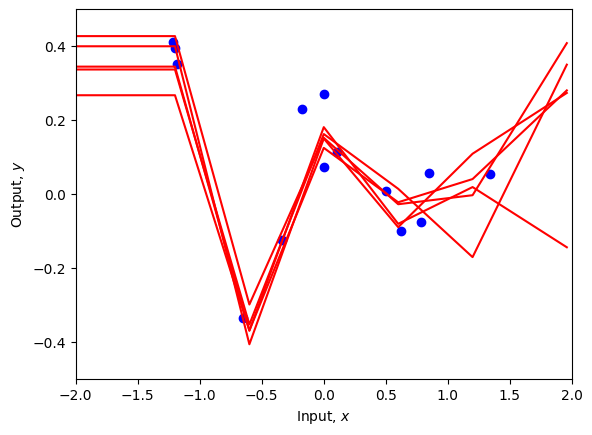

In [ ]:
# Draw samples from the function posterior and plot them
np.random.seed(5)
function_draws = np.random.multivariate_normal(np.squeeze(post_func_mean), post_func_cov, 5).T

fig,ax = plt.subplots()
ax.plot(X[0,:],y,'bo')
for i in range(function_draws.shape[1]):
  ax.plot(x_plot[0,:], function_draws[:,i].transpose(), 'r-')

ax.set_xlim(-2.,2.)
ax.set_ylim(-0.5, 0.5)
ax.set_xlabel('Input, $x$')
ax.set_ylabel('Output, $y$')
plt.show()

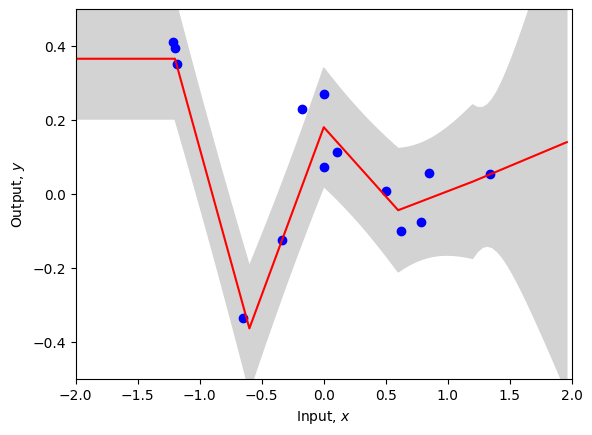

In [ ]:
fig,ax = plt.subplots()
ax.plot(X[0,:],y,'bo')
post_output_cov_diag = np.diag(post_output_cov)
ax.plot(x_plot[0,:], post_output_mean,'r-')
ax.fill_between(x_plot[0,:], post_output_mean-2*np.sqrt(post_output_cov_diag), post_output_mean+2*np.sqrt(post_output_cov_diag), color='lightgray')
ax.set_xlim(-2,2)
ax.set_ylim(-0.5, 0.5)
ax.set_xlabel('Input, $x$')
ax.set_ylabel('Output, $y$')
plt.show()

# Gaussian kernel regression

In [ ]:
def gaussian_kernel_one(x_i, x_j):
  return np.exp(-0.5 * (x_i-x_j) * (x_i-x_j)/0.25)

def gaussian_kernel(X1, X2):
  K = np.zeros((X1.shape[1], X2.shape[1]))
  for i in range(X1.shape[1]):
    for j in range(X2.shape[1]):
      K[i,j] = gaussian_kernel_one(X1[0,i],X2[0,j])
  return K

In [ ]:
# Define a prior over the parameters (2 dimensional as intercept + slope)
sigma_sq_p = 0.4
sigma_sq_n = 0.005
prior_param_mean = np.zeros((2,1))
prior_param_cov = sigma_sq_p * np.identity(2)

# Prior mean and covariance for function, f
prior_func_mean = np.zeros((n_data, 1))
prior_func_cov = sigma_sq_p * gaussian_kernel(x_plot, x_plot)

# Prior mean and covariance for output, y
prior_output_mean = np.zeros((n_data, 1))
prior_output_cov = sigma_sq_p * gaussian_kernel(x_plot, x_plot)  + sigma_sq_n * np.identity(n_data)

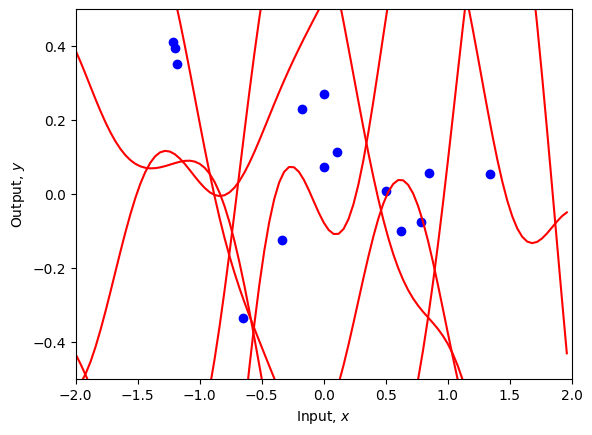

In [ ]:
# Draw samples from the function prior and plot them
np.random.seed(5)
function_draws = np.random.multivariate_normal(np.squeeze(prior_func_mean), prior_func_cov, 5).T

fig,ax = plt.subplots()
ax.plot(X[0,:],y,'bo')
for i in range(function_draws.shape[1]):
  ax.plot(x_plot[0,:], function_draws[:,i].transpose(), 'r-')

ax.set_xlim(-2,2)
ax.set_ylim(-0.5, 0.5)
ax.set_xlabel('Input, $x$')
ax.set_ylabel('Output, $y$')
plt.show()

In [ ]:
# Posterior mean and covariance for function, f
inv_term = np.linalg.inv(gaussian_kernel(X[0:1,:], X[0:1,:]) + (sigma_sq_n/sigma_sq_p) * np.identity(X.shape[1]))
post_func_mean = gaussian_kernel(x_plot, X[0:1,:]) @ inv_term @ y
post_func_cov = sigma_sq_p * gaussian_kernel(x_plot, x_plot)  - sigma_sq_p  * gaussian_kernel(x_plot, X[0:1,:]) @ inv_term @ gaussian_kernel(X[0:1,:], x_plot)

# Posterior mean and covariance for output, y
post_output_mean = gaussian_kernel(x_plot, X[0:1,:]) @ inv_term @ y
post_output_cov = sigma_sq_p * gaussian_kernel(x_plot, x_plot)  - sigma_sq_p  * gaussian_kernel(x_plot, X[0:1,:]) @ inv_term @ gaussian_kernel(X[0:1,:], x_plot) + sigma_sq_n * np.identity(n_data)

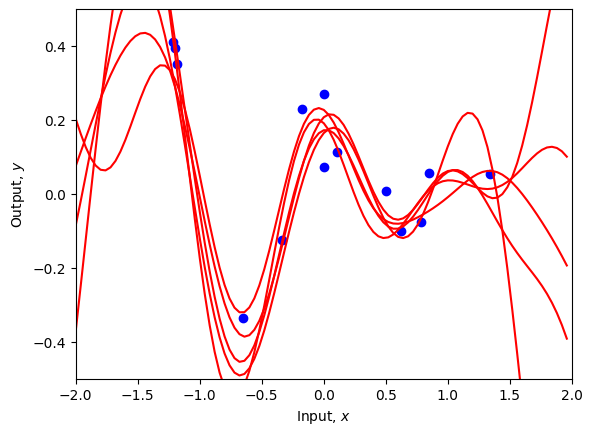

In [ ]:
# Draw samples from the function posterior and plot them
np.random.seed(5)
function_draws = np.random.multivariate_normal(np.squeeze(post_func_mean), post_func_cov, 5).T

fig,ax = plt.subplots()
ax.plot(X[0,:],y,'bo')
for i in range(function_draws.shape[1]):
  ax.plot(x_plot[0,:], function_draws[:,i].transpose(), 'r-')

ax.set_xlim(-2.,2.)
ax.set_ylim(-0.5, 0.5)
ax.set_xlabel('Input, $x$')
ax.set_ylabel('Output, $y$')
plt.show()

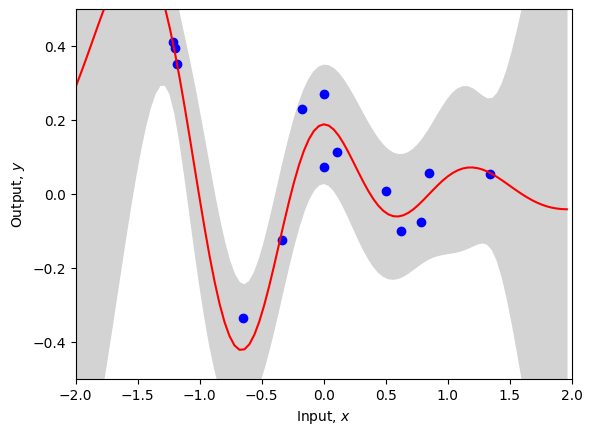

In [ ]:
fig,ax = plt.subplots()
ax.plot(X[0,:],y,'bo')
post_output_cov_diag = np.diag(post_output_cov)
ax.plot(x_plot[0,:], post_output_mean,'r-')
ax.fill_between(x_plot[0,:], post_output_mean-2*np.sqrt(post_output_cov_diag), post_output_mean+2*np.sqrt(post_output_cov_diag), color='lightgray')
ax.set_xlim(-2,2)
ax.set_ylim(-0.5, 0.5)
ax.set_xlabel('Input, $x$')
ax.set_ylabel('Output, $y$')
plt.show()